In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
chip_simulator = Aer.get_backend("qasm_simulator")

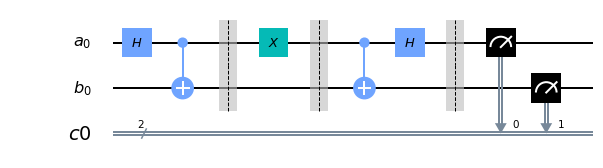

In [2]:
Alice = QuantumRegister(1, "a") # qubit de Alice
Bob = QuantumRegister(1, "b") # qubit de Bob
bits = ClassicalRegister(2) # bits de información clásica
qc = QuantumCircuit(Alice, Bob, bits)

code = "10" # bits que Alice quiere transmitir a Bob

qc.h(0)
qc.cx(0,1)
qc.barrier()

if code == "00":
    qc.iden(0)
elif code == "01":
    qc.z(0)
elif code == "10":
    qc.x(0)
else:
    qc.y(0)
qc.barrier()

qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)

qc.draw(output = "mpl")

In [12]:
print("Alice quería enviarle el mensaje " + code + " a Bob.")
print("Y por medio del protocolo de superdense coding, este recibió la cadena ", end = '')
print(execute(qc, chip_simulator, shots=1000).result().get_counts())

Alice quería enviarle el mensaje 10 a Bob.
Y por medio del protocolo de superdense coding, este recibió la cadena {'10': 1000}


In [17]:
(execute(qc, chip_simulator, shots=1000).result().get_counts().keys())

dict_keys(['10'])